In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Crio.do/chatgpt_reviews.csv")   # replace with your file path

# Overview
print(df.head())
print(df.info())
print(df.describe())


                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

           Review Date  
0  2024-08-23 19:30:05  
1  2024-08-23 19:28:18  
2  2024-08-23 19:22:59  
3  2024-08-23 19:20:50  
4  2024-08-23 19:20:39  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   R

In [3]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print(df.columns)


# Handle missing reviews
df['review'] = df['review'].fillna("")

# Convert date if present
if 'review_date' in df.columns:
    df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Ensure ratings are numeric
if 'ratings' in df.columns:
    df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')


Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [4]:
print(df.columns)


Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


In [5]:
def map_sentiment(ratings):
    if ratings >= 4:
        return "Positive"
    elif ratings == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['ratings'].apply(map_sentiment)
df[['review', 'ratings', 'sentiment']].head()


,review,ratings,sentiment
0,good,5,Positive
1,good,5,Positive
2,nice app,5,Positive
3,"nice, ig",5,Positive
4,"this is a great app, the bot is so accurate to...",5,Positive


/tmp/ipython-input-950199522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


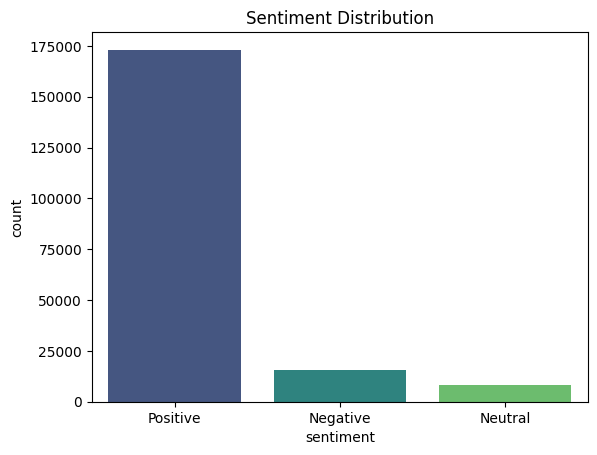

In [6]:
# Seaborn countplot
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

# Plotly interactive
fig = px.histogram(df, x="sentiment", color="sentiment", title="Sentiment Distribution (Interactive)")
fig.show()


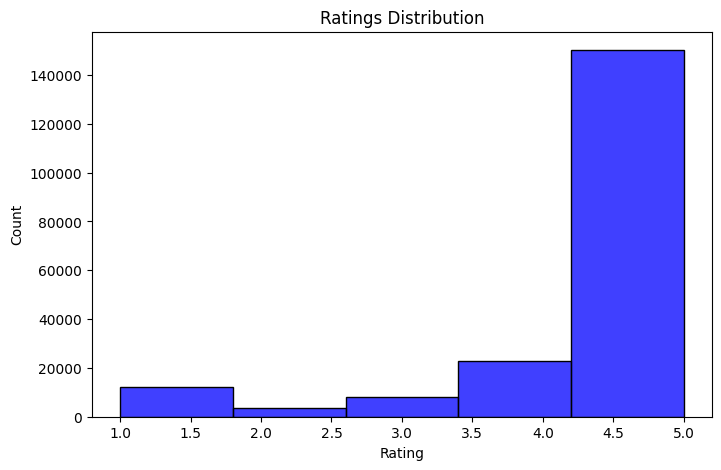

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['ratings'], bins=5, kde=False, color="blue")
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-4101066557.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




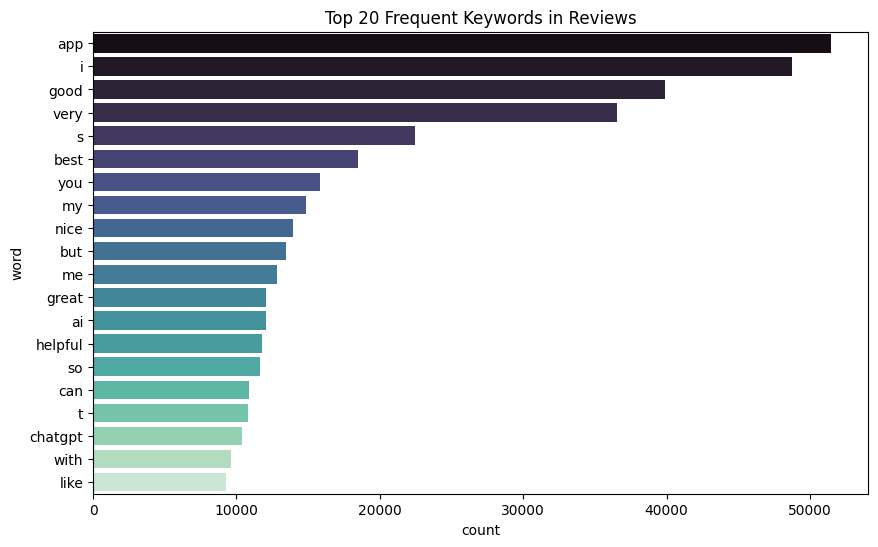

In [8]:
from collections import Counter
import re

# Tokenize reviews into words (basic cleaning)
tokens = []
for review in df['review']:
    words = re.findall(r'\b\w+\b', str(review).lower())
    tokens.extend(words)

# Remove stopwords manually
stopwords = set(["the", "and", "is", "to", "of", "a", "in", "it", "this", "for", "that"])
tokens = [word for word in tokens if word not in stopwords]

# Count most common keywords
word_freq = Counter(tokens).most_common(20)
word_df = pd.DataFrame(word_freq, columns=["word", "count"])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=word_df, x="count", y="word", palette="mako")
plt.title("Top 20 Frequent Keywords in Reviews")
plt.show()


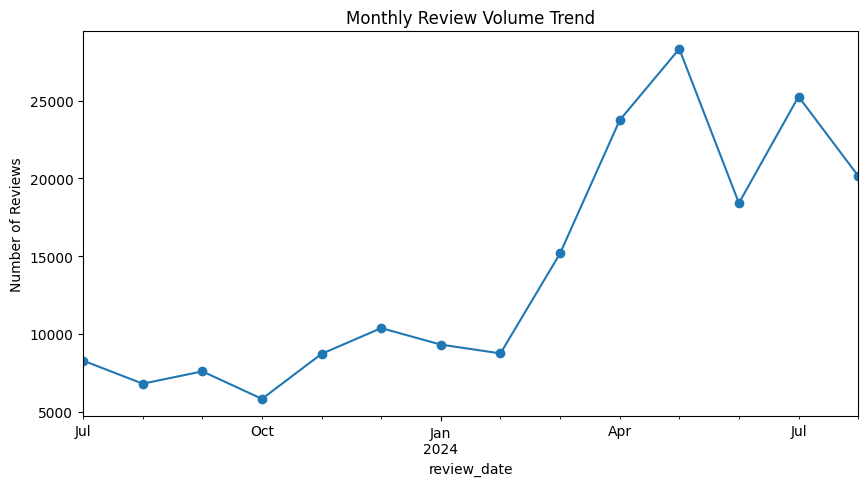

In [9]:
if 'review_date' in df.columns:
    monthly_sales = df.groupby(df['review_date'].dt.to_period('M'))['ratings'].count()
    monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
    plt.title("Monthly Review Volume Trend")
    plt.ylabel("Number of Reviews")
    plt.show()
